In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from kneed import KneeLocator as kn 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WineData - WineData.csv')

In [3]:
df.head()

,Unnamed: 0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df = df.drop('OD280', axis=1)   # Remove OD280 coloums.

In [6]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,735


In [7]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,560


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  Proline               178 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 16.8 KB


In [9]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,1680.000000


In [10]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'Proline'],
      dtype='object')

In [11]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
Proline                 0
dtype: int64

In [12]:
df.shape

(178, 12)

## Tasks

### Task 1: Data Preprocessing
- Handle any missing values if present.
- Scale the data using `StandardScaler` or `MinMaxScaler` since K-means is sensitive to the scale of features.
- Remove any unnecessary columns that don't contribute to clustering (e.g., index column if not relevant).

In [13]:
# count missing values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
Proline                 0
dtype: int64

There are no missing value in this dataset.

# StandardScaler

In the case of distance-based algorithms, data scaling during preprocessing is very important. Scaling is generally done in two common ways: Standard Scaling and Min-Max Scaling. If we compare the two, StandardScaler often performs better in cases where the data follows a normal distribution or when you want to center the data (i.e., mean = 0, standard deviation = 1), making it more suitable for algorithms like K-Means, K-NN, and SVM. However, MinMaxScaler is useful when you want to scale the data between a specific range, such as [0, 1], and it's commonly used when the data does not necessarily follow a normal distribution.

I already deleted the above OD280 columns.

In [15]:
standardarization = StandardScaler()

In [17]:
scaled_data = standardarization.fit_transform(df[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
                                       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
                                       'Proanthocyanins', 'Color_Intensity', 'Hue', 'Proline']])

In [18]:
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.25171685,
         0.36217728,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ..., -0.29332133,
         0.40605066,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.26901965,
         0.31830389,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ...,  2.22423597,
        -1.61212515,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ...,  1.83492299,
        -1.56825176,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ...,  1.79166599,
        -1.52437837, -0.59516041]])

### Task 2: Determine the Optimal Number of Clusters

- Use the **Elbow method** to determine the optimal number of clusters.
- Visualize the results using a line plot of the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters.

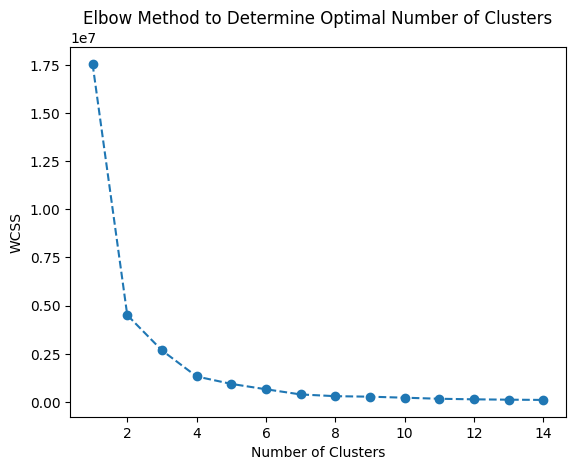

In [19]:
wcss = []
cluster_range = range(1, 15)


for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[['Alcohol', 'Proline']]) 
    wcss.append(kmeans.inertia_) 


plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

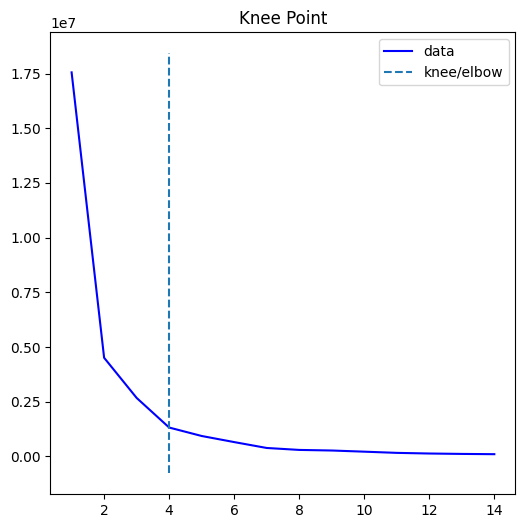

In [20]:
kl = kn(cluster_range, wcss, curve='convex', direction='decreasing')

kl.plot_knee()
plt.show()

In [21]:
wcss

[17552625.625942133,
 4507966.185337798,
 2673022.1422005515,
 1319386.6905985295,
 933162.5813881279,
 654560.6232637373,
 385511.3195837427,
 296451.80798875506,
 269571.6712420884,
 216590.53208365003,
 161708.0195267258,
 132231.32986573383,
 113793.45337938344,
 101511.1266316661]

In [22]:
kl.knee

4

Magnesium and Malic_Acid number of cluster.

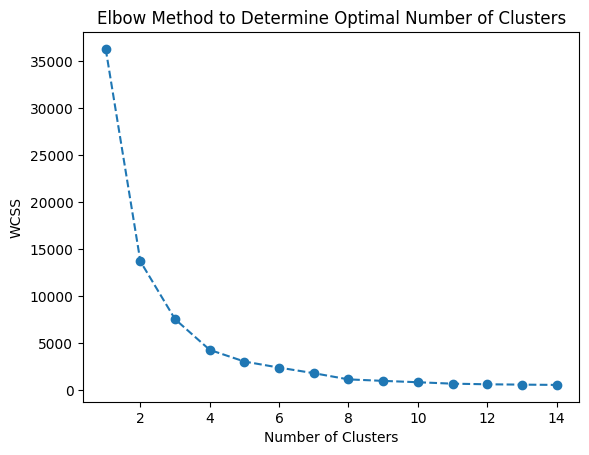

In [23]:
wcss = []
cluster_range = range(1, 15)


for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[['Magnesium', 'Malic_Acid']]) 
    wcss.append(kmeans.inertia_) 


plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

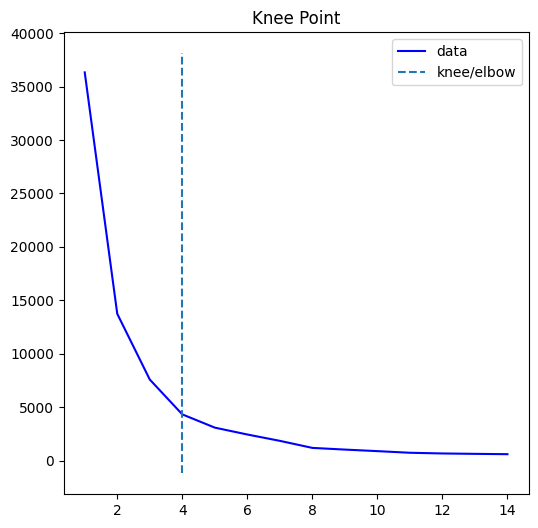

In [24]:
kl = kn(cluster_range, wcss, curve='convex', direction='decreasing')

kl.plot_knee()
plt.show()

In [25]:
kl.knee

4

### Task 3: K-means Clustering

- Apply K-means clustering using the optimal number of clusters obtained from the Elbow method.
- Assign cluster labels to each data point and create a new column in the dataset with these labels.

# After optimizing K-Means cluster

In [26]:
kmeans = KMeans(n_clusters=4)

df['Cluster'] = kmeans.fit_predict(df[['Magnesium', 'Malic_Acid']])

In [27]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,735,2


# Again separate korbo

In [31]:
centroids = kmeans.cluster_centers_

In [32]:
centroids

array([[137.22222222,   1.81666667],
       [ 98.87301587,   2.34015873],
       [113.09302326,   2.41093023],
       [ 86.14285714,   2.35587302]])

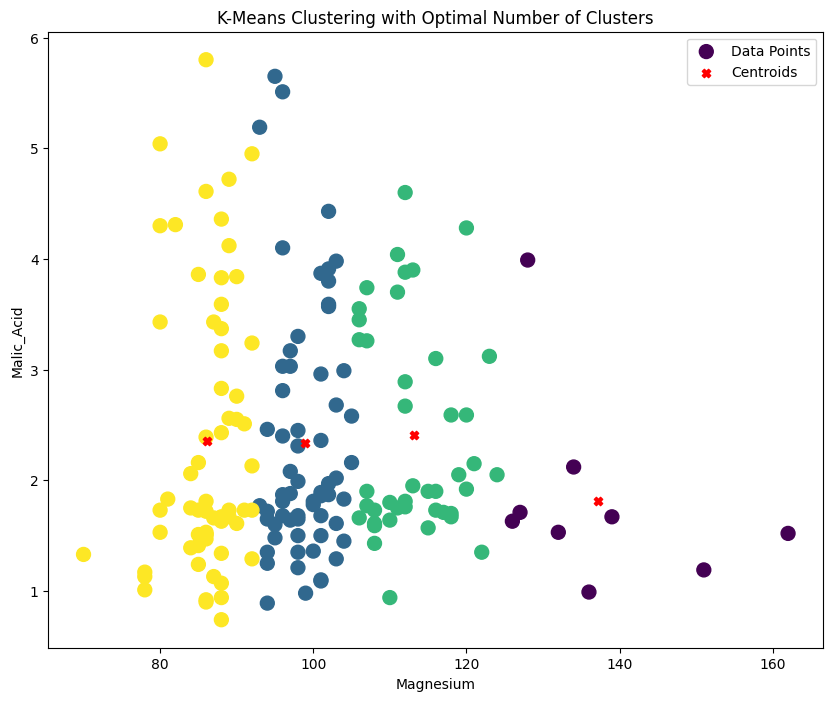

In [33]:
plt.figure(figsize=(10, 8))


plt.scatter(df['Magnesium'], df['Malic_Acid'], c=df['Cluster'], label='Data Points', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', label='Centroids')


plt.xlabel('Magnesium')
plt.ylabel('Malic_Acid')
plt.title('K-Means Clustering with Optimal Number of Clusters')
plt.legend()
plt.show()

### Task 4: Cluster Analysis

- Analyze the clusters by comparing the mean values of each feature within each cluster.
- Visualize the clusters using a pairplot or scatterplot for selected features to understand the separations visually.

In [34]:
cluster_means = df.groupby('Cluster').mean()

In [35]:
cluster_means

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,Proline
Cluster,,,,,,,,,,,,
0,13.120000,1.816667,2.351111,18.488889,137.222222,2.544444,2.365556,0.264444,2.208889,4.054444,1.114444,872.777778
1,13.095397,2.340159,2.406349,19.088889,98.873016,2.310159,2.020635,0.363492,1.576349,5.112857,0.967238,821.936508
2,13.349767,2.410930,2.502093,19.372093,113.093023,2.486279,2.330465,0.330698,1.591860,6.301163,0.916512,908.069767
3,12.650476,2.355873,2.236349,20.128571,86.142857,2.113968,1.784286,0.395397,1.516508,4.298254,0.953175,543.857143


# Cluster analysis using Heatmap.

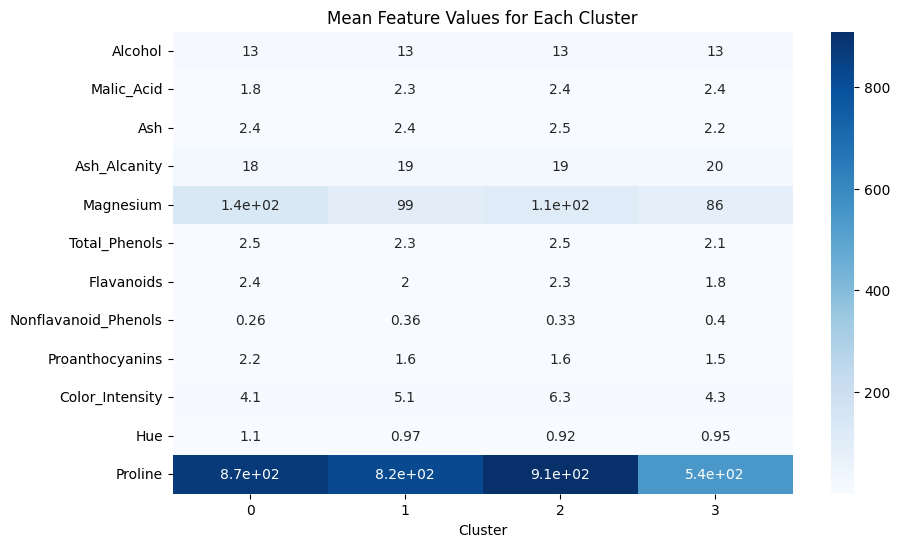

In [36]:
plt.figure(figsize=(10, 6))

sns.heatmap(cluster_means.T, annot=True, cmap='Blues')
plt.title('Mean Feature Values for Each Cluster')
plt.show()

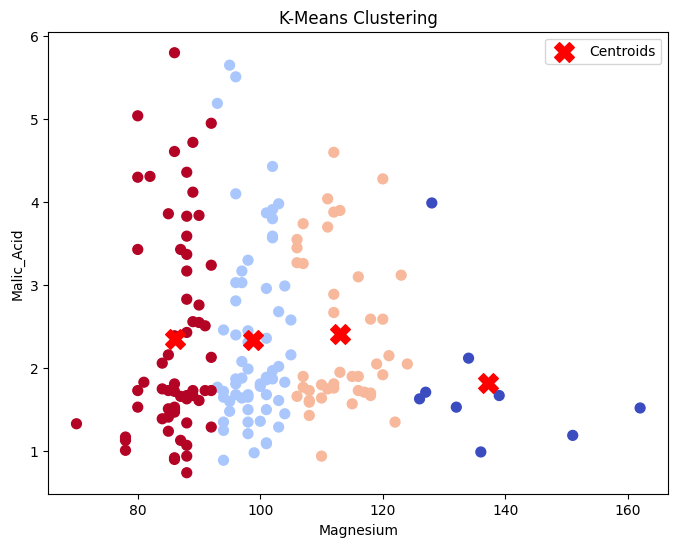

In [63]:

plt.figure(figsize=(8, 6))

plt.scatter(df['Magnesium'], df['Malic_Acid'], c=df['Cluster'], cmap='coolwarm', s=50)


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

plt.xlabel('Magnesium')
plt.ylabel('Malic_Acid')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

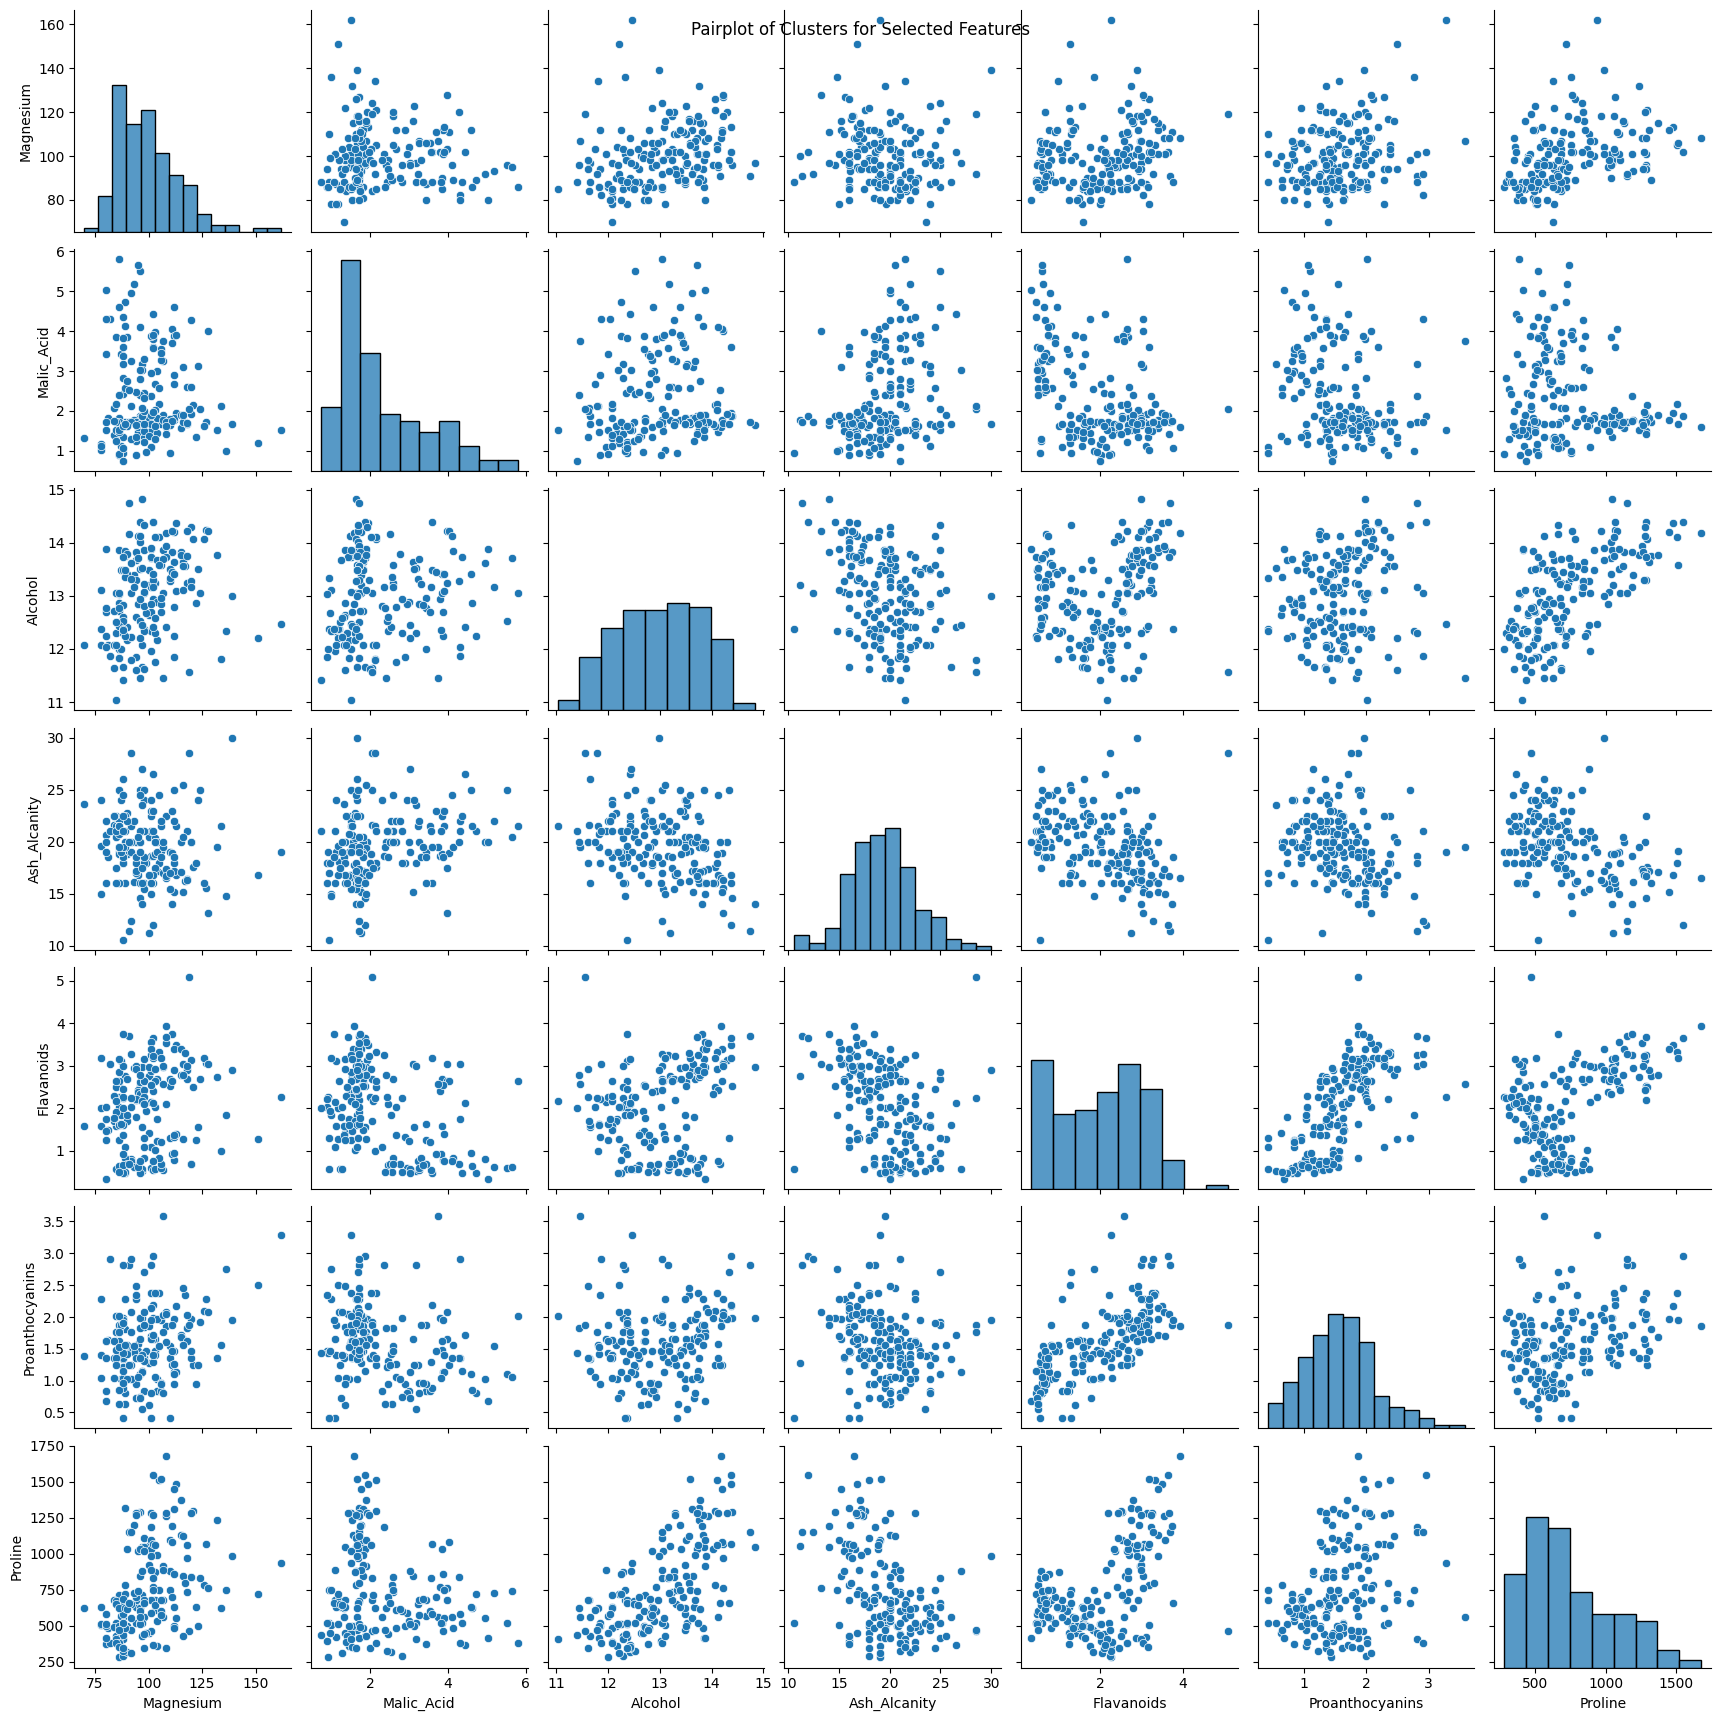

In [47]:
sns_pairplot = sns.pairplot(df[['Magnesium', 'Malic_Acid', 'Alcohol', 'Ash_Alcanity', 'Flavanoids', 'Proanthocyanins', 'Proline']])

sns_pairplot.fig.suptitle('Pairplot of Clusters for Selected Features')
plt.savefig('image.png')

# Barplot for expariance

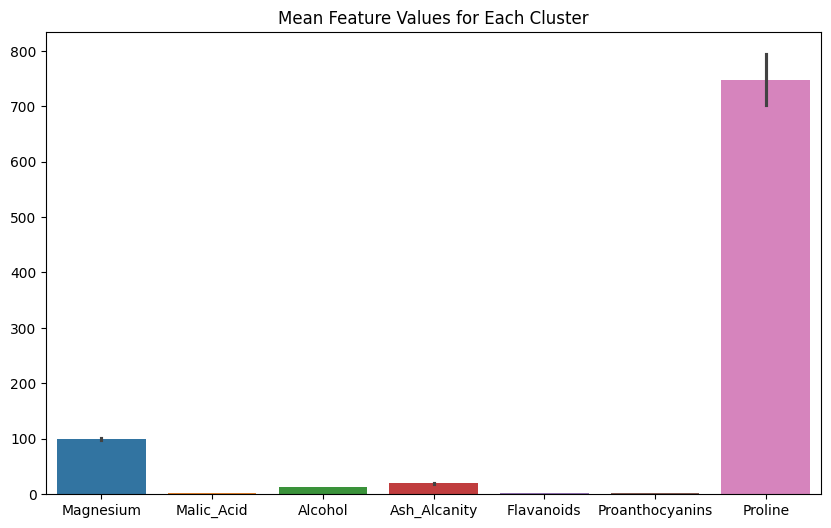

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(df[['Magnesium', 'Malic_Acid', 'Alcohol', 'Ash_Alcanity', 'Flavanoids', 'Proanthocyanins', 'Proline']])

plt.title('Mean Feature Values for Each Cluster')
plt.show()

### Task 5: Interpretation
- Interpret the characteristics of each cluster. For example, identify which cluster has the highest alcohol content, or which has the most intense color, etc.
- Suggest potential names or categories for each cluster based on the observed characteristics.

In [89]:
highest_val = df.max()
lowest_val = df.min()

# Print the results
print("1.Highest values for each column:")
print("=================================")
print(highest_val)

print("\n2.Lowest values for each column:")
print("=================================")
print(lowest_val)

1.Highest values for each column:
Alcohol                   14.83
Malic_Acid                 5.80
Ash                        3.23
Ash_Alcanity              30.00
Magnesium                162.00
Total_Phenols              3.88
Flavanoids                 5.08
Nonflavanoid_Phenols       0.66
Proanthocyanins            3.58
Color_Intensity           13.00
Hue                        1.71
Proline                 1680.00
Cluster                    3.00
dtype: float64

2.Lowest values for each column:
Alcohol                  11.03
Malic_Acid                0.74
Ash                       1.36
Ash_Alcanity             10.60
Magnesium                70.00
Total_Phenols             0.98
Flavanoids                0.34
Nonflavanoid_Phenols      0.13
Proanthocyanins           0.41
Color_Intensity           1.28
Hue                       0.48
Proline                 278.00
Cluster                   0.00
dtype: float64


In [133]:
feature_columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 
                    'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 
                    'Proanthocyanins', 'Color_Intensity', 'Hue', 'Proline']


for column in feature_columns:
    highest_value = df[column].max()
    row_with_max = df[df[column] == highest_value]
    highest_cluster = row_with_max['Cluster'].values[0]
    
   
    lowest_value = df[column].min()
    row_with_min = df[df[column] == lowest_value]
    lowest_cluster = row_with_min['Cluster'].values[0]
    
   
    print(f"Column: {column}")
    print(f"  - Highest value: {highest_value} and Cluster {highest_cluster}")
    print(f"  - Lowest value: {lowest_value} and Cluster {lowest_cluster}")
    print("------------------------------------------------------------")

Column: Alcohol
  - Highest value: 14.83 and Cluster 1
  - Lowest value: 11.03 and Cluster 3
------------------------------------------------------------
Column: Malic_Acid
  - Highest value: 5.8 and Cluster 3
  - Lowest value: 0.74 and Cluster 3
------------------------------------------------------------
Column: Ash
  - Highest value: 3.23 and Cluster 2
  - Lowest value: 1.36 and Cluster 3
------------------------------------------------------------
Column: Ash_Alcanity
  - Highest value: 30.0 and Cluster 0
  - Lowest value: 10.6 and Cluster 3
------------------------------------------------------------
Column: Magnesium
  - Highest value: 162 and Cluster 0
  - Lowest value: 70 and Cluster 3
------------------------------------------------------------
Column: Total_Phenols
  - Highest value: 3.88 and Cluster 2
  - Lowest value: 0.98 and Cluster 3
------------------------------------------------------------
Column: Flavanoids
  - Highest value: 5.08 and Cluster 2
  - Lowest value: 0.3

In [127]:
highest_malic_acid = df['Malic_Acid'].max()
row_num = df[df['Malic_Acid'] == highest_malic_acid]
Malic_acid_cluster_num = row_num['Cluster'].values[0]


lowest_malic_acid = df['Malic_Acid'].min()
row_num = df[df['Malic_Acid'] == lowest_malic_acid]
cluster_num = row_num['Cluster'].values[0] 


print(f"Highest Malic_Acid is: {highest_malic_acid}")
print(f"The cluster number: {Malic_acid_cluster_num}")

print(f"\nThe lowest Malic_Acid is: {lowest_malic_acid}")
print(f"The cluster number: {cluster_num}")

Highest Malic_Acid is: 5.8
The cluster number: 3

The lowest Malic_Acid is: 0.74
The cluster number: 3


### Characteristics of each cluster.

### Cluster 1: "Mineral-Rich & Balanced"
- Category Name: "Mineral Elegance"
- Description: Wines in Cluster 1 are notable for their high Ash Alcanity, indicating a significant mineral content. These wines are likely balanced in their other characteristics, making them approachable for those who enjoy moderate acidity and body.
- Target Audience: Wine lovers who appreciate minerality and prefer smooth, balanced wines with a refined taste profile.
    
### Cluster 2: "Rich & Bold"
- Category Name: "Powerhouse Reds"
- Description: Cluster 2 stands out with the highest alcohol content, deep color intensity, and high phenolic content (including flavonoids and proanthocyanins). These wines are bold, full-bodied, and likely to have strong, complex flavors. With both the highest and lowest alcohol in this cluster, it suggests a broad range of rich wines.
- Target Audience: Ideal for those who love big, bold wines with intense flavors, high alcohol, and visual richness. Great for wine enthusiasts who enjoy complex, full-bodied reds.

### Cluster 3: "Light & Delicate"
- Category Name: "Fresh & Elegant"
- Description: Wines in Cluster 3 are characterized by low intensity in terms of color and phenolic content. These wines are light-bodied, less acidic, and have a more delicate flavor profile. They are likely smooth, with less structure and tannin, making them easy to drink.
- Target Audience: Perfect for those who prefer lighter wines with delicate flavors and a softer mouthfeel. These wines may appeal to casual wine drinkers or those looking for refreshing, elegant wines.

### Suggest potential names

### 1. Cluster 1:
- Suggested Name: "Mineral Elegance"
- Key Attributes: Balanced, with a notable mineral profile (high Ash Alcanity).
- Appeal: Great for lovers of refined, mineral-driven wines.
    
### 2. Cluster 2:
- Suggested Name: "Powerhouse Reds"
- Key Attributes: Bold, full-bodied, with high alcohol and deep color.
- Appeal: Ideal for those who enjoy intense, complex wines.
    
### 3. Cluster 3:
- Suggested Name: "Fresh & Elegant"
- Key Attributes: Light, delicate, with low color intensity and soft flavors.
- Appeal: Appeals to those who prefer lighter-bodied, refreshing wines.

### 4. Cluster 4:
-
-
-

In [134]:
kl.knee

4